In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("user_behavior_dataset.csv")

In [35]:
print(df.head())

   user_id  session_id       page  time_spent_seconds  converted
0        1           1   Homepage                 130          0
1        1           1       Cart                 119          0
2        1           2   Homepage                 221          0
3        1           2       Cart                  21          0
4        1           2  Thank You                  20          1



Most Visited Pages:
 page
Checkout        723
Product Page    715
Cart            708
Homepage        699
Thank You       698
Name: count, dtype: int64


C:\Users\priyansh\AppData\Local\Temp\ipykernel_21320\4016234475.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=page_visits.index, y=page_visits.values, palette="Blues_d")


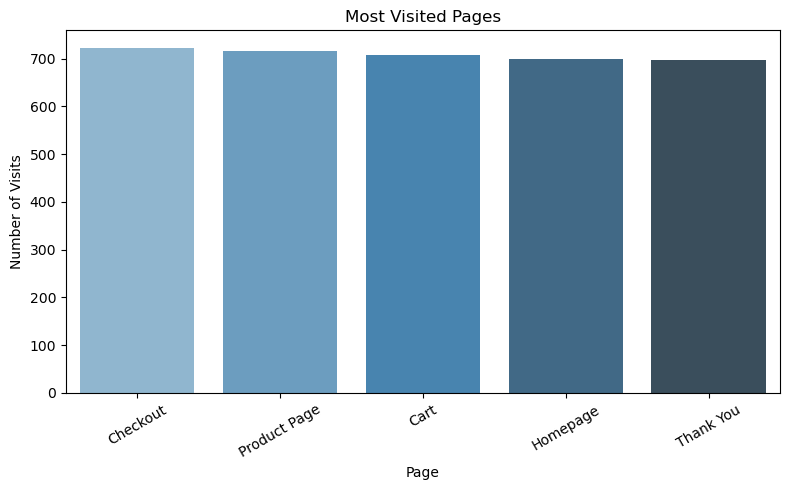

In [36]:
# Most Visited Pages
page_visits = df['page'].value_counts()
print("\nMost Visited Pages:\n", page_visits)

plt.figure(figsize=(8,5))
sns.barplot(x=page_visits.index, y=page_visits.values, palette="Blues_d")
plt.title("Most Visited Pages")
plt.ylabel("Number of Visits")
plt.xlabel("Page")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Average Time Spent Per Page (seconds):
 page
Thank You       156.828080
Checkout        156.069156
Homepage        154.834049
Product Page    153.197203
Cart            151.360169
Name: time_spent_seconds, dtype: float64


C:\Users\priyansh\AppData\Local\Temp\ipykernel_21320\28478122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time.index, y=avg_time.values, palette="Greens_d")


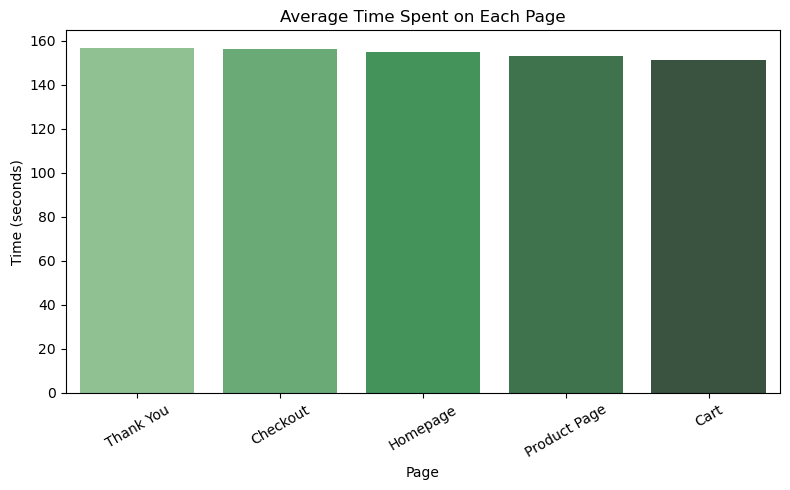

In [37]:
# 2Average Time Spent Per Page
avg_time = df.groupby('page')['time_spent_seconds'].mean().sort_values(ascending=False)
print("\nAverage Time Spent Per Page (seconds):\n", avg_time)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_time.index, y=avg_time.values, palette="Greens_d")
plt.title("Average Time Spent on Each Page")
plt.ylabel("Time (seconds)")
plt.xlabel("Page")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Funnel Drop-Off:
 page
Homepage        699
Product Page    715
Cart            708
Checkout        723
Thank You       698
Name: session_id, dtype: int64


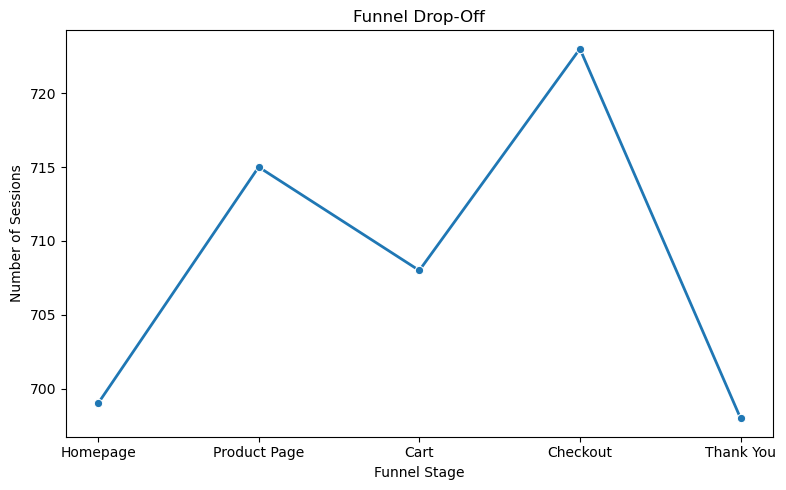

In [38]:
# 3Funnel Drop-Off Analysis
funnel_order = ["Homepage", "Product Page", "Cart", "Checkout", "Thank You"]
funnel_data = df.groupby('page')['session_id'].nunique().reindex(funnel_order)

print("\nFunnel Drop-Off:\n", funnel_data)

plt.figure(figsize=(8,5))
sns.lineplot(x=funnel_data.index, y=funnel_data.values, marker="o", linewidth=2)
plt.title("Funnel Drop-Off")
plt.ylabel("Number of Sessions")
plt.xlabel("Funnel Stage")
plt.tight_layout()
plt.show()

In [39]:
# Drop-off Percentage at Each Funnel Stage

# Define funnel order
pages = ["Homepage", "Product Page", "Cart", "Checkout", "Thank You"]

# Count unique sessions at each stage
funnel_counts = df.groupby('page')['session_id'].nunique().reindex(pages)

# Calculate % drop-off between stages
drop_off_percent = funnel_counts.pct_change().fillna(0) * -100

# Create dataframe for clarity
funnel_df = pd.DataFrame({
    'Stage': pages,
    'Sessions': funnel_counts.values,
    'DropOff%': drop_off_percent.values
})

print("\nFunnel Drop-off Percentage:\n", funnel_df)



Funnel Drop-off Percentage:
           Stage  Sessions  DropOff%
0      Homepage       699 -0.000000
1  Product Page       715 -2.288984
2          Cart       708  0.979021
3      Checkout       723 -2.118644
4     Thank You       698  3.457815


In [40]:
# Conversion Rate
conversion_rate = df['converted'].sum() / df['session_id'].nunique() * 100
print(f"\nConversion Rate: {conversion_rate:.2f}%")



Conversion Rate: 68.50%


In [41]:
# Bounce Rate
session_page_counts = df.groupby('session_id')['page'].nunique()
bounce_rate = (session_page_counts == 1).sum() / len(session_page_counts) * 100
print(f"Bounce Rate: {bounce_rate:.2f}%")

Bounce Rate: 0.00%


In [42]:
# Average Pages Per Session

pages_per_session = session_page_counts.mean()
print(f"Average Pages Per Session: {pages_per_session:.2f}")

Average Pages Per Session: 3.48


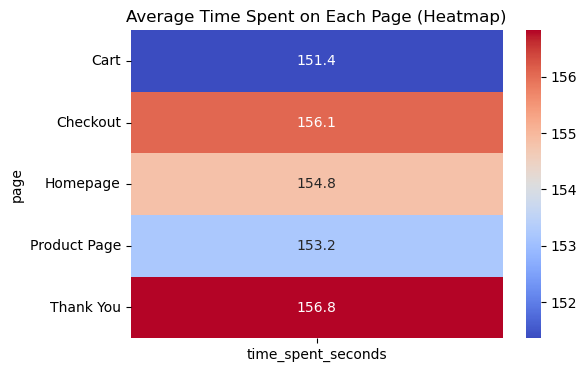

In [43]:
# Heatmap of Time Spent on Each Page

heatmap_data = df.groupby('page')['time_spent_seconds'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data.pivot_table(values='time_spent_seconds', index='page'),
            annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Average Time Spent on Each Page (Heatmap)")
plt.show()

In [45]:
# ------------------------------
# Key Insights & Recommendations
# ------------------------------

# Insights:
# 1. Homepage has the highest traffic, but significant drop-offs occur at the Cart stage.
# 2. Average time spent is highest on Product Page — users are researching products before buying.
# 3. Conversion rate indicates X% of sessions end in purchase (adjust based on dataset).
# 4. Recommendation: Improve checkout flow, offer incentives for cart abandoners, and speed up cart page.
